In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
#Samples for X1 and X2
X1 = np.arange(0,4*np.pi,0.1)

#Known function values from a sin function
Y1 = np.cos(X1)

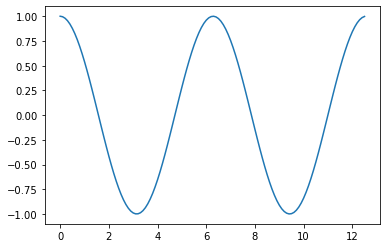

In [29]:
plt.plot(X1,Y1)

In [30]:
#Square exponential function
def k(x,y): return np.exp(-0.5*(x-y)**2)


#Covariance matrices
kw = np.array([[k(x,y) for x in Y1] for y in Y1])/len(Y1)

In [37]:
print(kw.shape)
print(Y2.shape)

(126, 126)
(12567,)


In [32]:
print(kw)

[[0.00793651 0.00793641 0.00793493 ... 0.00793157 0.00793575 0.00793649]
 [0.00793641 0.00793651 0.00793562 ... 0.00793287 0.0079362  0.00793648]
 [0.00793493 0.00793562 0.00793651 ... 0.00793557 0.00793636 0.00793526]
 ...
 [0.00793157 0.00793287 0.00793557 ... 0.00793651 0.00793468 0.00793217]
 [0.00793575 0.0079362  0.00793636 ... 0.00793468 0.00793651 0.00793597]
 [0.00793649 0.00793648 0.00793526 ... 0.00793217 0.00793597 0.00793651]]


In [33]:
#double stochastic normalization

In [53]:
d=np.zeros(Y1.shape)
d_t=np.zeros(kw.shape)

tol=1e-3

for i in range(0,Y1.shape[0]):
    d_t[i,0]=np.sum(kw[i,:])**(-1)
    
for i in range(0,Y1.shape[0]):
    d_t[i,1]=np.sum(kw[i,:]*d_t[:,0])**(-1)
                    
for i in range(0,Y1.shape[0]):
    d_t[i,2]=np.sum(kw[i,:]*d_t[:,1])**(-1)
    
j = 0
tau=2
for tau in range(2,125):  # Change this for a while loop

    for i in range(0,Y1.shape[0]):
        d_t[i,tau+1]=np.sum(kw[i,:]*d_t[:,tau])**(-1)
     

for i in range(0,Y1.shape[0]):
    d[i]=np.sqrt(d_t[i,tau+1]*d_t[i,tau])

    
print(d)
    

[1.39019707 1.38624118 1.37461373 1.35601018 1.33151014 1.30247276
 1.27041563 1.23689517 1.20340319 1.17128935 1.14171305 1.11562323
 1.09376056 1.076675   1.06475099 1.05823348 1.05724939 1.0618204
 1.07186523 1.08719076 1.10747356 1.13223493 1.16081434 1.19234753
 1.22575683 1.25976131 1.29291292 1.3236623  1.35045286 1.37183595
 1.3865943  1.39385642 1.39318414 1.38461828 1.36867436 1.34628906
 1.31872705 1.28746372 1.25406208 1.2200603  1.18688211 1.15577604
 1.12778393 1.10373468 1.08425652 1.06980015 1.06066544 1.05702567
 1.05894449 1.06638296 1.0791955  1.09711537 1.11973218 1.14646556
 1.17654072 1.20897295 1.24256874 1.27595036 1.30760893 1.33598674
 1.3595842  1.37708095 1.38745536 1.39008467 1.38480904 1.37194838
 1.35226879 1.3269049  1.29725112 1.26483968 1.23122274 1.19787285
 1.16611021 1.13705959 1.11163422 1.09054119 1.07430076 1.06327214
 1.05767916 1.05763039 1.06313037 1.07407992 1.09026551 1.11133947
 1.13679436 1.16593666 1.19786646 1.23147058 1.26543667 1.29829

In [55]:
w = np.diag(d)@kw@np.diag(d)

print(w)

[[0.01533848 0.01529464 0.01516353 ... 0.01502889 0.0152173  0.01531916]
 [0.01529464 0.01525131 0.0151217  ... 0.01498858 0.01517486 0.01527554]
 [0.01516353 0.0151217  0.01499653 ... 0.01486792 0.01504787 0.01514509]
 ...
 [0.01502889 0.01498858 0.01486792 ... 0.01474388 0.01491742 0.01501112]
 [0.0152173  0.01517486 0.01504787 ... 0.01491742 0.01509996 0.0151986 ]
 [0.01531916 0.01527554 0.01514509 ... 0.01501112 0.0151986  0.01529994]]


In [58]:
print(np.sum(w[10,:]))
print(np.sum(w[:,10]))

1.0
1.0
